In [33]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [34]:
raw_data = pd.read_csv("D:\machine learning\magic\Sleep_health_and_lifestyle_dataset.csv")
df = raw_data.copy()
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


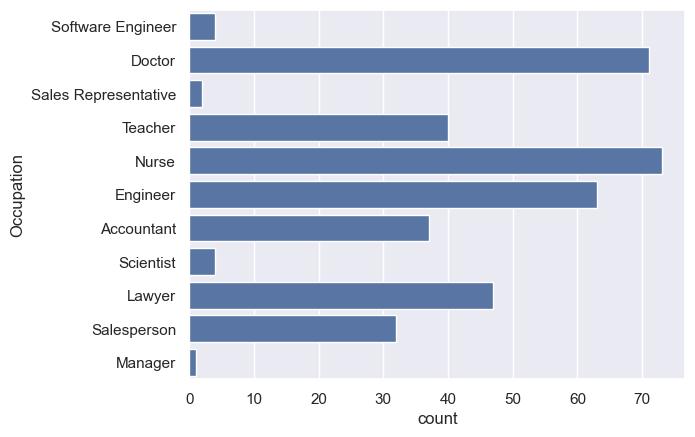

In [35]:
sns.countplot(y='Occupation', data = df)
plt.show()

In [36]:
to_combine = ['Software Engineer', 'Sales Representative', 'Scientist', 'Manager']
df['Occupation'] = df['Occupation'].replace(to_combine, 'Other')

In [37]:
df_bp_split = pd.concat([df, df['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)
df_bp_split.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,0,1
0,1,Male,27,Other,6.1,6,42,6,Overweight,77,4200,NaN,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
3,4,Male,28,Other,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Other,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [38]:
df_bp_split = df_bp_split.rename(columns={0: 'bp_upper', 1: 'bp_lower'})
df_bp_split.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,bp_upper,bp_lower
0,1,Male,27,Other,6.1,6,42,6,Overweight,77,4200,NaN,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
3,4,Male,28,Other,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Other,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [39]:
df_bp_split['bp_upper'] = df_bp_split['bp_upper'].astype('int')
df_bp_split['bp_lower'] = df_bp_split['bp_lower'].astype('int')

In [40]:
df_bp_split = df_bp_split.drop('Person ID', axis=1)
df_bp_split.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,bp_upper,bp_lower
0,Male,27,Other,6.1,6,42,6,Overweight,77,4200,NaN,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
3,Male,28,Other,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Other,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [41]:
dummies = pd.get_dummies(df_bp_split[['Gender', 'Occupation', 'BMI Category']])
df_bp_split = pd.concat([df_bp_split, dummies], axis = 1)

In [42]:
df_bp_split = df_bp_split.drop(['Gender', 'Occupation', 'BMI Category'], axis = 1)

In [43]:
unscaled = df_bp_split.copy()

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

class CustomScaler(BaseEstimator, TransformerMixin):

    def __init__(self, columns, copy=True, with_mean=True, with_std=True):
        self.columns = columns
        self.copy = copy
        self.with_mean = with_mean
        self.with_std = with_std

    def fit(self, X, y=None):
        self.scaler = StandardScaler(copy=self.copy, with_mean=self.with_mean, with_std=self.with_std)
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self

    def transform(self, X, y=None, copy=None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        X_not_scaled = X.loc[:, ~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis = 1)[init_col_order]

In [45]:
columns_reordered = ['Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Heart Rate',
       'Daily Steps', 'bp_upper', 'bp_lower',
       'Gender_Female', 'Gender_Male', 'Occupation_Accountant',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer',
       'Occupation_Nurse', 'Occupation_Other', 'Occupation_Salesperson',
       'Occupation_Teacher', 'BMI Category_Normal', 'BMI Category_Obese',
       'BMI Category_Overweight','Sleep Disorder']

In [46]:
unscaled = unscaled[columns_reordered]
unscaled.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,bp_upper,bp_lower,Gender_Female,...,Occupation_Engineer,Occupation_Lawyer,Occupation_Nurse,Occupation_Other,Occupation_Salesperson,Occupation_Teacher,BMI Category_Normal,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder
0,27,6.1,6,42,6,77,4200,126,83,False,...,False,False,False,True,False,False,False,False,True,NaN
1,28,6.2,6,60,8,75,10000,125,80,False,...,False,False,False,False,False,False,True,False,False,NaN
2,28,6.2,6,60,8,75,10000,125,80,False,...,False,False,False,False,False,False,True,False,False,NaN
3,28,5.9,4,30,8,85,3000,140,90,False,...,False,False,False,True,False,False,False,True,False,Sleep Apnea
4,28,5.9,4,30,8,85,3000,140,90,False,...,False,False,False,True,False,False,False,True,False,Sleep Apnea


In [47]:
unscaled["Sleep Disorder"]=unscaled["Sleep Disorder"].fillna(unscaled["Sleep Disorder"].mode()[0])

In [69]:
unscaled.nunique()

Age                        31
Sleep Duration             27
Quality of Sleep            6
Physical Activity Level    16
Stress Level                6
Heart Rate                 19
Daily Steps                20
bp_upper                   18
bp_lower                   17
Gender_Female               2
Gender_Male                 2
Occupation_Accountant       2
Occupation_Doctor           2
Occupation_Engineer         2
Occupation_Lawyer           2
Occupation_Nurse            2
Occupation_Other            2
Occupation_Salesperson      2
Occupation_Teacher          2
BMI Category_Normal         2
BMI Category_Obese          2
BMI Category_Overweight     2
Sleep Disorder              2
dtype: int64

In [48]:
unscaled.isnull().sum()

Age                        0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
Heart Rate                 0
Daily Steps                0
bp_upper                   0
bp_lower                   0
Gender_Female              0
Gender_Male                0
Occupation_Accountant      0
Occupation_Doctor          0
Occupation_Engineer        0
Occupation_Lawyer          0
Occupation_Nurse           0
Occupation_Other           0
Occupation_Salesperson     0
Occupation_Teacher         0
BMI Category_Normal        0
BMI Category_Obese         0
BMI Category_Overweight    0
Sleep Disorder             0
dtype: int64

In [49]:
unscaled_inputs = unscaled.iloc[:,:-1]

In [50]:
columns_to_omit = ['Gender_Female',
       'Gender_Male', 'Occupation_Accountant', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Nurse',
       'Occupation_Other', 'Occupation_Salesperson', 'Occupation_Teacher',
       'BMI Category_Normal', 'BMI Category_Obese',
       'BMI Category_Overweight']

In [51]:
columns_to_scale = [x for x in unscaled_inputs.columns.values if x not in columns_to_omit]

In [52]:
sleep_scaler = CustomScaler(columns_to_scale)

In [53]:
sleep_scaler.fit(unscaled_inputs)

c:\Users\bhnvm\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


CustomScaler(columns=['Age', 'Sleep Duration', 'Quality of Sleep',
                      'Physical Activity Level', 'Stress Level', 'Heart Rate',
                      'Daily Steps', 'bp_upper', 'bp_lower'])

In [54]:
scaled_inputs = sleep_scaler.transform(unscaled_inputs)

In [55]:
targets = unscaled['Sleep Disorder']

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, #train_size = 0.8, 
                                                                            test_size = 0.2, random_state = 20)

In [58]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [59]:
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)

scores = cross_val_score(svm, x_train, y_train, cv=13)

In [62]:
svm.fit(x_train, y_train)

SVC(gamma=0.5)

In [63]:
y_pred = svm.predict(x_test)

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
a = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred, average=None)
print(p)
print(a)

[1.         0.96721311]
0.9733333333333334


In [67]:
c = confusion_matrix(y_test, y_pred)
print(c)

[[14  2]
 [ 0 59]]
